# SARIMA

SARIMA accepts an additional set of parameters: (P, D, Q)m that describes the sesonal components of a model
* P - seasonal regression
* D - seasonal differenceing 
* Q - seasonal moving average
* m - number of data points (rows) in each seasonal cycle. Monthly data with a yearly seasonal cycle, m = 12

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [5]:
from pmdarima import auto_arima

In [6]:
df = pd.read_csv("/Users/tanojudawattage/1_tanoj/0.00_Cloud_Computing_and_Streaming_Tech/Python_for_Time_Series_Files_JosePortilla/Data/co2_mm_mlo.csv")

In [7]:
df.head()

,year,month,decimal_date,average,interpolated
0,1958,3,1958.208,315.71,315.71
1,1958,4,1958.292,317.45,317.45
2,1958,5,1958.375,317.50,317.50
3,1958,6,1958.458,NaN,317.10
4,1958,7,1958.542,315.86,315.86


In [22]:
# use year and month to create a datetime index
df['date'] = pd.to_datetime({'year':df['year'], 'month':df['month'], 'day':1}) # assume days sart from 1st of the month


In [23]:
df.head()

,year,month,decimal_date,average,interpolated,date
0,1958,3,1958.208,315.71,315.71,1958-03-01
1,1958,4,1958.292,317.45,317.45,1958-04-01
2,1958,5,1958.375,317.50,317.50,1958-05-01
3,1958,6,1958.458,NaN,317.10,1958-06-01
4,1958,7,1958.542,315.86,315.86,1958-07-01


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729 entries, 0 to 728
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   year          729 non-null    int64         
 1   month         729 non-null    int64         
 2   decimal_date  729 non-null    float64       
 3   average       722 non-null    float64       
 4   interpolated  729 non-null    float64       
 5   date          729 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 34.3 KB


In [24]:
# set the date column as index
df = df.set_index('date')

In [25]:
df.head()

,year,month,decimal_date,average,interpolated
date,,,,,
1958-03-01,1958,3,1958.208,315.71,315.71
1958-04-01,1958,4,1958.292,317.45,317.45
1958-05-01,1958,5,1958.375,317.50,317.50
1958-06-01,1958,6,1958.458,NaN,317.10
1958-07-01,1958,7,1958.542,315.86,315.86


In [26]:
# set frequency to month start
df.index.freq = 'MS'

In [27]:
df.head()

,year,month,decimal_date,average,interpolated
date,,,,,
1958-03-01,1958,3,1958.208,315.71,315.71
1958-04-01,1958,4,1958.292,317.45,317.45
1958-05-01,1958,5,1958.375,317.50,317.50
1958-06-01,1958,6,1958.458,NaN,317.10
1958-07-01,1958,7,1958.542,315.86,315.86


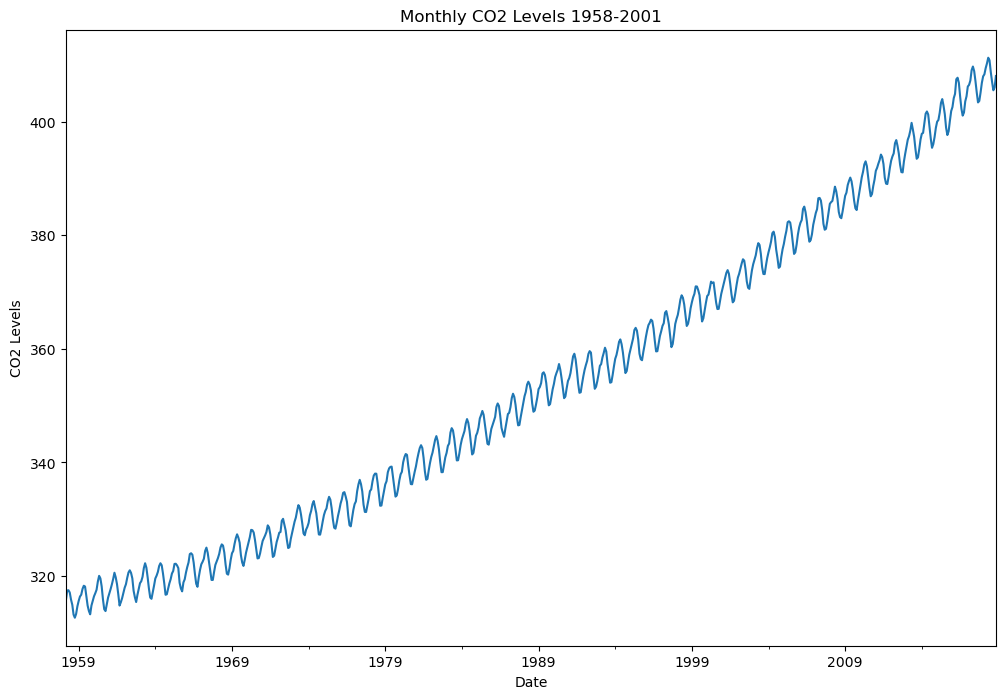

In [28]:
# plot the interpolated co2 data
df['interpolated'].plot(figsize=(12,8))
plt.ylabel('CO2 Levels')
plt.xlabel('Date')
plt.title('Monthly CO2 Levels 1958-2001')
plt.show()

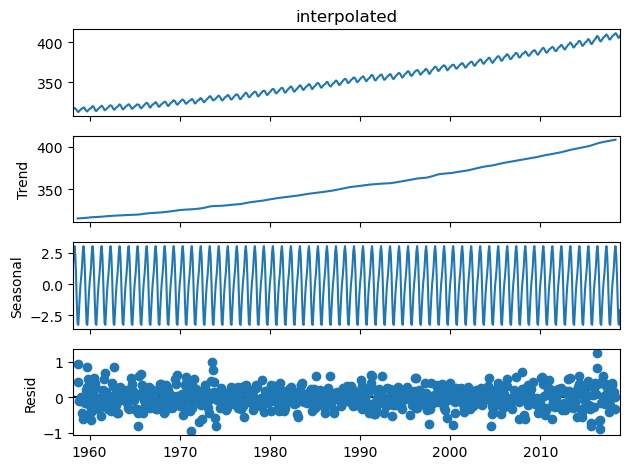

In [29]:
# decompose the time series to check for seasonality
result = seasonal_decompose(df['interpolated'], model='additive', period=12)
result.plot()
plt.show()

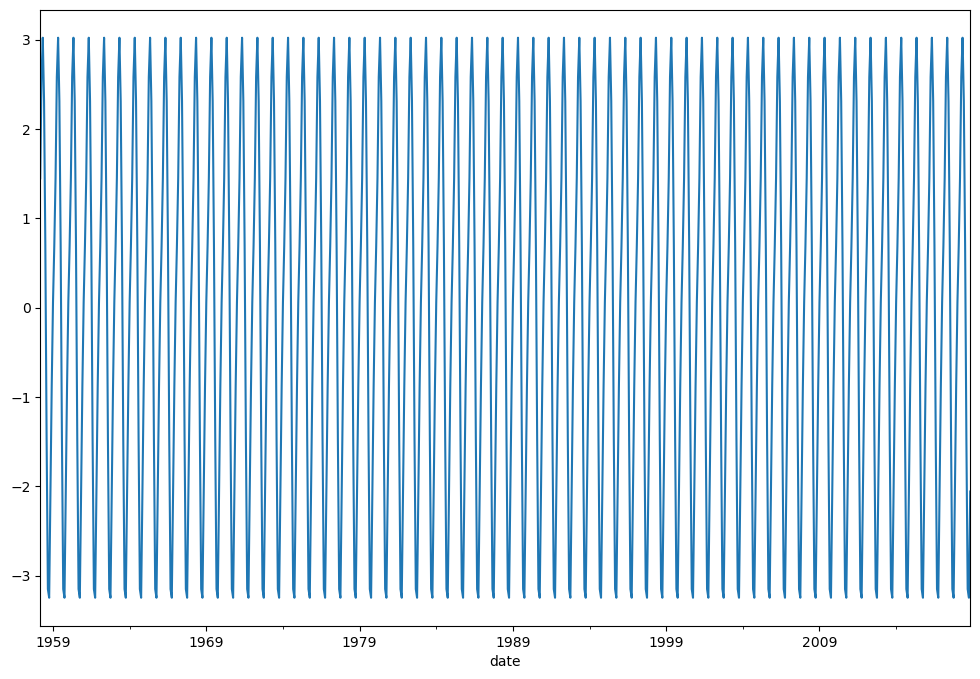

In [31]:
# check out the seasonal component to understand what to select for 'm'
result.seasonal.plot(figsize=(12,8))
plt.show()

## auto_arima to find the best parameters

In [33]:
# run auto_arima to find the best parameters for SARIMA model
auto_arima(df['interpolated'], seasonal=True, m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  729
Model:             SARIMAX(2, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -206.253
Date:                            Sun, 07 Dec 2025   AIC                            424.506
Time:                                    17:05:09   BIC                            452.048
Sample:                                03-01-1958   HQIC                           435.133
                                     - 11-01-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3520      0.078      4.494      0.000       0.198       0.506
ar.L2          0.0880      0.027      3.294      0.001       0.036       0.140
ma.L1         -0.7074      0.063    -11.203      0.000      -0.831      -0.584
ar.S.L12       0.9996      0.000   2959.396      0.000       0.999       1.000
ma.S.L12      -0.8662      0.021    -40.739      0.000      -0.908      -0.825
sigma2         0.0956      0.005     20.438      0.000       0.086       0.105
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 4.46
Prob(Q):                              0.79   Prob(JB):                         0.11
Heteroskedasticity (H):               1.13   Skew:                            -0.00
Prob(H) (two-sided):                  0.35   Kurtosis:                         3.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Train-Test split

In [34]:
len(df)

729

In [35]:
# test on 12 months
train = df.iloc[:717]
test = df.iloc[717:]

In [39]:
model = SARIMAX(train['interpolated'], order=(2,1,1), seasonal_order=(1,0,1,12))
results = model.fit()
results.summary()

/opt/anaconda3/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                       interpolated   No. Observations:                  717
Model:             SARIMAX(2, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -201.882
Date:                            Sun, 07 Dec 2025   AIC                            415.763
Time:                                    17:14:24   BIC                            443.205
Sample:                                03-01-1958   HQIC                           426.360
                                     - 11-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3463      0.055      6.242      0.000       0.238       0.455
ar.L2          0.0821      0.029      2.830      0.005       0.025       0.139
ma.L1         -0.6993      0.055    -12.720      0.000      -0.807      -0.592
ar.S.L12       0.9996      0.000   2941.550      0.000       0.999       1.000
ma.S.L12      -0.8666      0.023    -38.372      0.000      -0.911      -0.822
sigma2         0.0952      0.005     20.391      0.000       0.086       0.104
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                 4.72
Prob(Q):                              0.78   Prob(JB):                         0.09
Heteroskedasticity (H):               1.14   Skew:                             0.02
Prob(H) (two-sided):                  0.30   Kurtosis:                         3.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [40]:
# predicted values for test set
start = len(train)
end = len(train) + len(test) - 1

In [41]:
predictions = results.predict(start, end, typ='levels').rename('SARIMA Predictions')

## Plot predictions against the test results

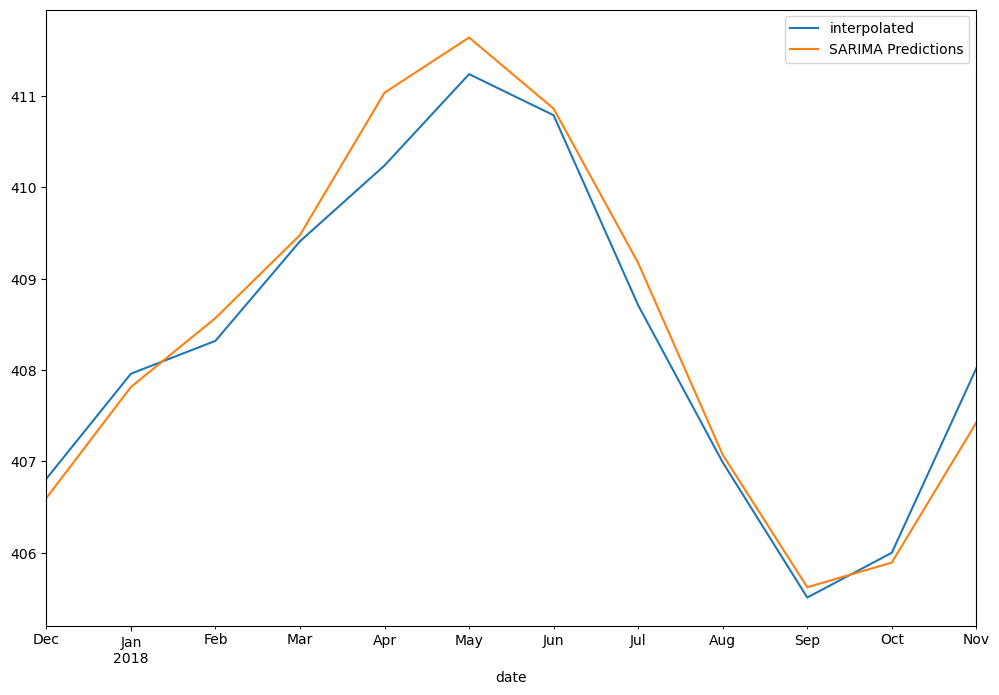

In [42]:
test['interpolated'].plot(figsize=(12,8), legend=True)
predictions.plot(legend=True)
plt.show()

## Evaluate the model

In [43]:
from statsmodels.tools.eval_measures import rmse

In [44]:
error = rmse(test['interpolated'], predictions)

In [45]:
error

np.float64(0.35734068070674696)

#### Compare error to the test mean

In [46]:
test['interpolated'].mean()

np.float64(408.3333333333333)

# Forecast into the Unknown Future

## Re-train data on the full model and forecast into the future

In [47]:
model = SARIMAX(train['interpolated'], order=(2,1,1), seasonal_order=(1,0,1,12))
sarima_results = model.fit()


/opt/anaconda3/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


#### Get the forecasted values

In [48]:
fcast = sarima_results.predict(len(df), len(df)+11, typ='levels').rename('SARIMA Forecast')

#### Plot the real values and the forecated future values

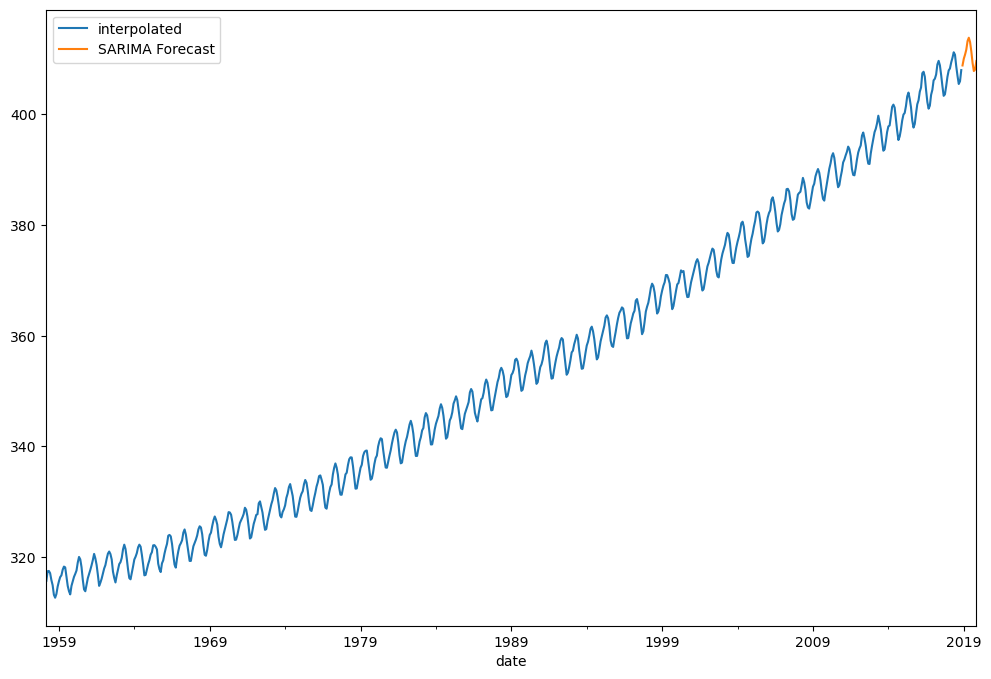

In [49]:
df['interpolated'].plot(figsize=(12,8), legend=True)
fcast.plot(legend=True)
plt.show()